# Task 4.2

### Data Preparation

In [3]:
# importing data
import pandas  as pd

df = pd.read_csv("E:\\Internship\\Week 4\\archive\\archive\\boston.csv")

# Display the first few rows of the dataset
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Building

In [10]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

# Define the models
linear_regression = LinearRegression()
ridge_regression = Ridge()
random_forest = RandomForestRegressor()


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipelines
pipelines = {
    'lr': Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
    'ridge': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
    'rf': Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
}

# Define the hyperparameters for GridSearchCV
param_grids = {
    'lr': {},
    'ridge': {'ridge__alpha': [0.1, 1.0, 10.0]},
    'rf': {'rf__n_estimators': [100, 200], 'rf__max_features': ['sqrt', 'log2']}
}

# Perform GridSearchCV
best_models = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

best_models


{'lr': Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())]),
 'ridge': Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())]),
 'rf': Pipeline(steps=[('scaler', StandardScaler()),
                 ('rf',
                  RandomForestRegressor(max_features='log2', n_estimators=200))])}

### Model Evaluation

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate models
performance = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    performance[name] = {'rmse': rmse, 'r2': r2, 'y_test': y_test, 'y_pred': y_pred}

# Print the performance of each model
for name, perf in performance.items():
    print(f"{name.upper()} Model:")
    print(f"RMSE: {perf['rmse']:.2f}")
    print(f"R²: {perf['r2']:.2f}")
    print()


LR Model:
RMSE: 4.93
R²: 0.67

RIDGE Model:
RMSE: 4.93
R²: 0.67

RF Model:
RMSE: 3.12
R²: 0.87



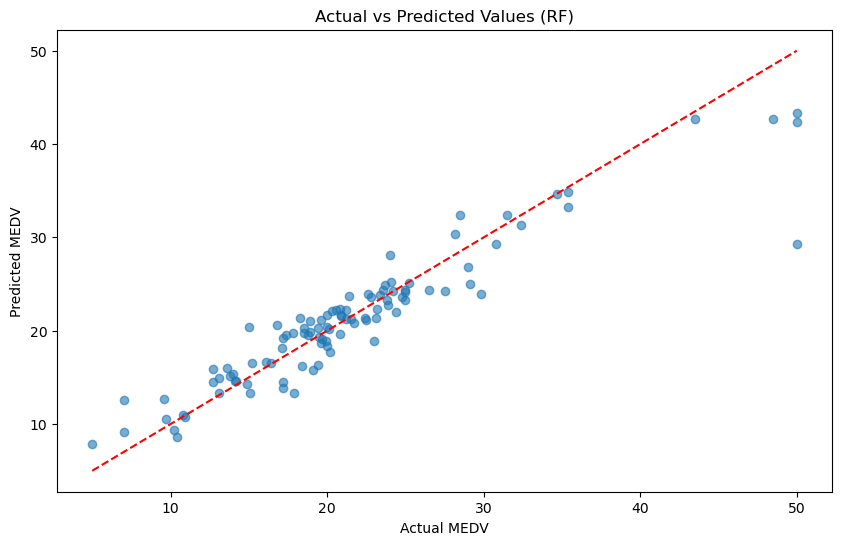

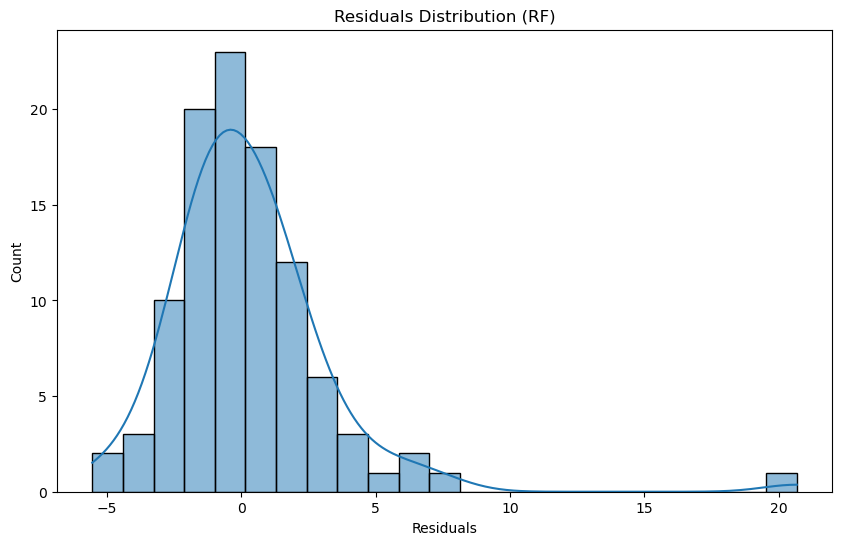

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the actual vs predicted values for the best model (example: Random Forest Regressor)
best_model_name = 'rf'
plt.figure(figsize=(10, 6))
plt.scatter(performance[best_model_name]['y_test'], performance[best_model_name]['y_pred'], alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title(f'Actual vs Predicted Values ({best_model_name.upper()})')
plt.show()

# Plot residuals for the best model
residuals = performance[best_model_name]['y_test'] - performance[best_model_name]['y_pred']
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title(f'Residuals Distribution ({best_model_name.upper()})')
plt.show()
